# Eman Khaled  



# Color Identifcation in Images

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

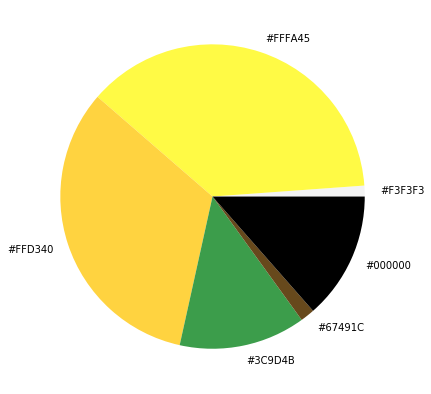

In [2]:
img = cv2.imread("flower.png")
#main colors that can be in an image with different shades and are detected:
#white yellow orange red green violet blue gray brown black
#print(img.shape)
#a list used to store number of pixels of each colour in the image  
color_pix=[]
#a list that store the hexa values of the colors present in an image which will be used in plotting the pie chart
hex_colors=[]

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

major_colors_dict={"white": "#F3F3F3", "yellow": "#FFFA45", "orange": "#FFD340", "red": "#AA110F" , "green": "#3C9D4B",
              "violet": "#A87CA0", "blue": "#286DE5","gray":"#808080","brown": "#67491C","black": "#000000"}

#lower bounds of major colors
lower_white=np.array([0, 0, 168])
lower_yellow=np.array([25,150,50])
lower_orange=np.array([15, 150, 0])
lower_red=np.array([161, 155, 84])
lower_green=np.array([36, 50, 70])
lower_violet=np.array([145, 50, 0])
lower_blue=np.array([90, 50, 70])
lower_gray=np.array([0, 0, 40])
lower_brown=np.array([10, 100, 20])
lower_black=np.array([0, 0, 0])

#upper bounds of major colors
upper_white= np.array([172, 111, 255])
upper_yellow= np.array([30, 255, 255])
upper_orange= np.array([25, 255, 255])
upper_red= np.array([180, 255,255])
upper_green= np.array([89, 255,255])
upper_violet= np.array([155, 255,255])
upper_blue= np.array([128, 255,255])
upper_gray= np.array([180, 18,230])
upper_brown= np.array([20, 255,200])
upper_black= np.array([180,255,30])

lower_bound=[lower_white, lower_yellow, lower_orange, lower_red, lower_green, lower_violet, lower_blue, lower_gray, lower_brown,
            lower_black]

upper_bound= [upper_white, upper_yellow, upper_orange, upper_red, upper_green, upper_violet, upper_blue, upper_gray, upper_brown,
            upper_black]

for i,key in enumerate(major_colors_dict.keys()):    #i is the iterator index
    #A mask is used for each colour using lower and upper boundary of hsv for each color
    mask=cv2.inRange(hsv,lower_bound[i], upper_bound[i])     
    #check if the image has this color by counting number of white pixels in the mask as if the resulted mask image is totally 
    #black therefore, the original image does not have this range of color
    #otherwise the pixels having this color in the original image will turn to white in the mask image
    white_pix= np.sum(mask == 255)    
    if(white_pix!= 0): 
        color_pix.append(white_pix)
        hex_colors.append(major_colors_dict[key])
        
#print(color_pix)
#print(hex_colors)

# using dictionary comprehension
# to convert Two lists to dictionary

output_dict = {color_pix[i]: hex_colors[i] for i in range(len(color_pix))}
#print(output_dict)

#Removing from the dictionary: items with low number of pixels to display only the major colors that can be visible in an image 
keys_list=[]
for key in output_dict:
    keys_list.append(key)

for element in keys_list:
    if element<=(0.2/100)*img.shape[0]*img.shape[1]:
        output_dict.pop(element)
#print(output_dict)

color_pix=[]
color_pix=[key for key in output_dict.keys()]
#print(color_pix)

hex_colors=[]
hex_colors=[value for value in output_dict.values()]
#print(hex_colors)


#plotting the colours in a pie chart
fig = plt.figure(figsize =(10, 7))
plt.pie(color_pix,labels=hex_colors,colors=hex_colors)

#mask=cv2.inRange(hsv, (0, 0, 168), (172,111,255))   


cv2.imshow("original image",img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 






